# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [294]:
from cProfile import label

# Cargar todas las librerías
import pandas as pd
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

## Cargar datos

In [295]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [296]:
calls.info()
internet.info()
messages.info()
plans.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

In [297]:
print(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [298]:
print(users['churn_date'].sample(50))

356           NaN
409           NaN
431           NaN
311           NaN
151           NaN
241           NaN
62            NaN
64            NaN
196           NaN
355           NaN
392           NaN
314           NaN
299           NaN
284           NaN
294           NaN
109           NaN
114           NaN
489           NaN
70            NaN
350           NaN
48            NaN
490           NaN
474           NaN
174           NaN
341           NaN
400           NaN
14            NaN
455           NaN
464           NaN
124           NaN
191    2018-11-30
185           NaN
440           NaN
85            NaN
142           NaN
386           NaN
296    2018-12-18
288           NaN
200           NaN
46            NaN
40     2018-12-30
321           NaN
388           NaN
12     2018-11-16
217           NaN
235           NaN
207           NaN
153           NaN
251           NaN
188           NaN
Name: churn_date, dtype: object


In [299]:
print(calls)
print(internet)
print(messages)
print(users)

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]
              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_

## Tarifas

In [300]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [301]:
# Imprime una muestra de los datos para las tarifas
print(plans.sample())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Inicialmente al revisar la tabla plans, en la columna de churn_date, podria entenderse que esta mal el tipo de dato, pero los valores ausentes que tiene se podrian sustituir por un 'Active', entonces quedaria bien dejarlo como tipo string.
En cuanto a la columna de 'duracion', se esta manejando en un tipo flotante, mientras que lo correcto seria manejarlo en un tipo entero, ya que se nos indica que la compañia redondea a enteros a pesar de que se haya consumido solo 1 segundo, se sube a 1 minuto.
El manejo de fechas estan en formato string, lo ideal es que fueran en formato datetime, pero para usos practicos de analisis, se podria considerar que string esta bien, al final se podria crear una columna adicional.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [302]:
calls['duration'] = np.ceil(calls['duration']) # redondea hacia arriba siempre que > 0
calls['duration'] = pd.to_numeric(calls['duration']).astype(int)
print(calls)

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27         9
1       1000_145     1000  2018-12-27        14
2       1000_247     1000  2018-12-27        15
3       1000_309     1000  2018-12-28         6
4       1000_380     1000  2018-12-30         5
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21         9
137731  1499_200     1499  2018-10-20        11
137732  1499_201     1499  2018-09-21         9
137733  1499_202     1499  2018-10-10         1
137734  1499_203     1499  2018-12-29        14

[137735 rows x 4 columns]


In [303]:
users['status'] = users['churn_date'].apply(
    lambda x: 'Active' if pd.isna(x) else 'Inactive'
)
users['churn_date'] = users['churn_date'].fillna('active')
print(users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [304]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
 8   status      500 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [305]:
# Imprime una muestra de datos para usuarios
print(users.sample(50))


     user_id  first_name   last_name  age  \
492     1492       Elvie       Jones   63   
421     1421        Zane       Hobbs   26   
49      1049       Loise       Avery   25   
275     1275       Elvie   Velazquez   33   
54      1054       Denis       Frost   50   
102     1102   Marquitta      Walton   30   
411     1411         Man     Fleming   64   
140     1140    Randolph      Graves   53   
188     1188    Ethelene       Brock   31   
42      1042  Clementina  Mclaughlin   40   
176     1176    Terrance     Shaffer   75   
44      1044      Devora    Galloway   74   
360     1360      Arturo     Mullins   75   
130     1130    Clarence  Cunningham   27   
441     1441      Piedad       Myers   23   
198     1198        Russ       Horne   69   
383     1383   Margarito       Mccoy   52   
81      1081      Grayce       Sears   44   
17      1017       Boris       Gates   61   
25      1025        Jess   Wilkinson   64   
160     1160      Steven      Morgan   44   
128     11

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

Los datos ausentes que antes se tenian, ya se corrigieron, ya no tenemos ausentes porque fueron reemplazados por un string 'active', pero ademas se agrego una columna adicional que nos puede servir para representar en una metrica de activos vs inactivos, donde el valor original era de 6.8% de usuarios inactivos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [306]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         137735 non-null  object
 1   user_id    137735 non-null  int64 
 2   call_date  137735 non-null  object
 3   duration   137735 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.146673
std,139.416268,5.953919
min,1000.000000,0.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


In [307]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(50))


               id  user_id   call_date  duration
31144    1117_118     1117  2018-10-12         0
116328    1407_28     1407  2018-12-12         6
19240     1073_47     1073  2018-08-13         0
27713    1105_264     1105  2018-10-27         9
7609     1036_201     1036  2018-12-05         1
132079   1475_226     1475  2018-08-22         0
111474   1391_333     1391  2018-12-17         2
819      1004_340     1004  2018-11-12        22
35540   1132_1070     1132  2018-08-07        12
116616   1408_265     1408  2018-02-14         1
130002   1467_238     1467  2018-11-27         8
128809   1464_323     1464  2018-12-19         0
38031    1142_222     1142  2018-11-08         7
53390    1191_538     1191  2018-08-06         0
135457   1491_354     1491  2018-11-14        16
97240     1347_66     1347  2018-09-20        12
99781    1358_120     1358  2018-08-28        14
56283    1201_384     1201  2018-07-04         0
24678   1094_1281     1094  2018-12-10         5
87342   1320_1011   

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Se puede ver que tenemos una duracion promedio (media) de 7 min, con una desviacion estandar de ~6 min, por lo que su varianza seria de ~35. Tiene una mediana de 6, por lo que se puede inferir un sesgo a la derecha, pero tenemos un maximo de 38, por lo que posiblemente haya valores atipicos alrededor de 38 min por los usuarios intensivos.
Despues de la correccion previa que se hizo convirtiendo la duracion en tipo entero y redondeando, ya no se visualizan datos por corregir.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

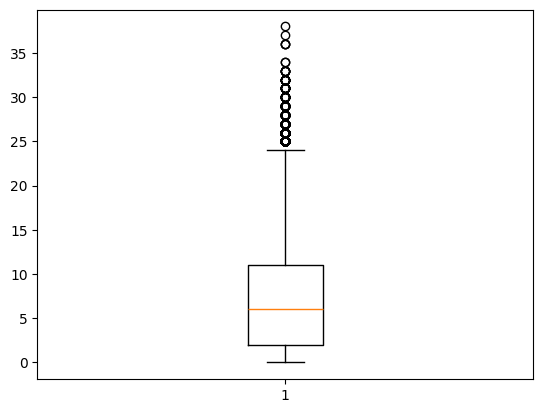

In [308]:
plt.boxplot(calls['duration'])
plt.show()

Text(0, 0.5, 'Usuarios')

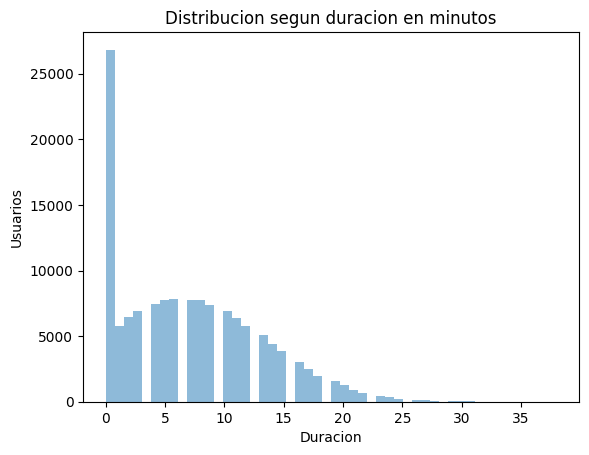

In [309]:
plt.hist(calls['duration'],bins=50,alpha=0.5)
plt.title('Distribucion segun duracion en minutos')
plt.xlabel('Duracion')
plt.ylabel('Usuarios')

## Mensajes

In [310]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [311]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(50))


             id  user_id message_date
73191  1470_819     1470   2018-09-11
23300   1141_94     1141   2018-09-22
53318  1339_452     1339   2018-10-26
47244  1320_488     1320   2018-06-11
13845  1094_245     1094   2018-12-09
17977  1119_293     1119   2018-10-07
25268  1151_111     1151   2018-09-03
29203  1178_375     1178   2018-11-08
58681   1373_99     1373   2018-10-25
47181  1320_425     1320   2018-08-02
68238  1440_104     1440   2018-09-26
1463   1014_186     1014   2018-12-27
45033  1302_138     1302   2018-12-10
23577   1144_37     1144   2018-12-03
12916  1084_156     1084   2018-11-13
50445  1329_385     1329   2018-10-18
29723  1183_118     1183   2018-10-26
65769   1424_82     1424   2018-12-27
21277  1132_550     1132   2018-06-19
46135   1314_23     1314   2018-12-27
75787   1494_25     1494   2018-09-02
9896   1075_151     1075   2018-11-15
9619   1069_957     1069   2018-12-07
5020    1046_82     1046   2018-07-04
24233   1145_88     1145   2018-11-20
38391  1252_

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

La media y mediana son casi iguales, por lo que su distribucion es equilibrada, tienen una distribucion normal, no contiene valores atipicos ya que su valor maximo (1497) esta dentro del rango IQR = 239

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

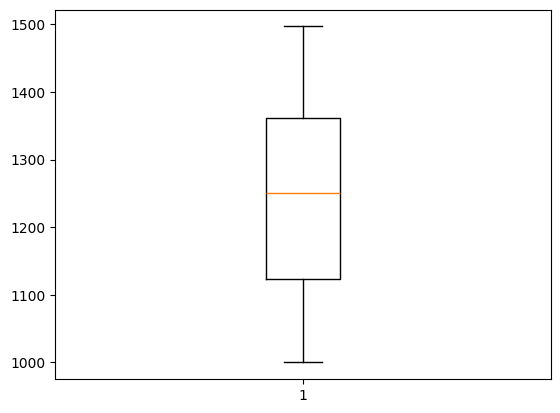

In [312]:
plt.boxplot(messages['user_id'])
plt.show()

## Internet

In [313]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [314]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(50))


              id  user_id session_date  mb_used
60789    1277_92     1277   2018-07-10   353.66
54085   1245_118     1245   2018-08-18   686.22
54691   1247_106     1247   2018-12-24   357.44
82287    1385_38     1385   2018-09-26   207.18
64387   1295_359     1295   2018-11-11   382.21
57266   1258_285     1258   2018-11-30   595.77
5114    1028_695     1028   2018-02-28     0.00
286     1002_172     1002   2018-10-31     0.00
30481    1140_24     1140   2018-08-01   997.02
13570    1064_18     1064   2018-09-14    53.01
90198   1415_302     1415   2018-12-30   176.64
15859   1072_104     1072   2018-12-07   638.99
76507   1359_188     1359   2018-04-06   949.77
43619    1194_37     1194   2018-12-07   474.32
37075   1166_241     1166   2018-12-15   696.03
85677   1399_288     1399   2018-06-14   404.54
3217    1017_272     1017   2018-11-18   347.25
43418   1193_267     1193   2018-11-28     0.00
57482    1259_26     1259   2018-04-27   926.99
70692    1330_41     1330   2018-12-18  

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Segun los datos que tenemos del promedio (media) y la mediana(50%), son valores muy cercanos, pero tiene un valor maximo muy alto, por lo que estara sesgado a la derecha, ademas en la distribucion de caja tendremos valores atipicos. La mayoria de los usuarios no usa tanto el internet, usan menos de lo que tiene contratado.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

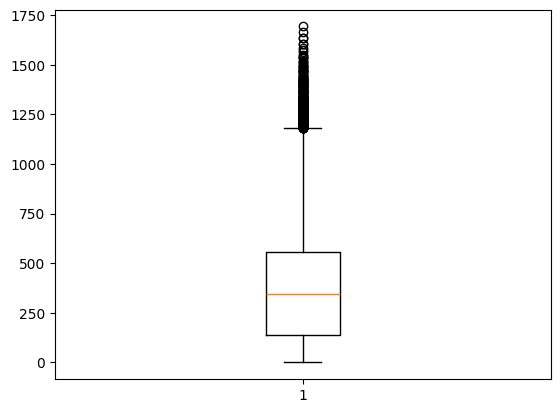

In [315]:
plt.boxplot(internet['mb_used'])
plt.show()

Text(0.5, 1.0, 'Mb usados x usuario')

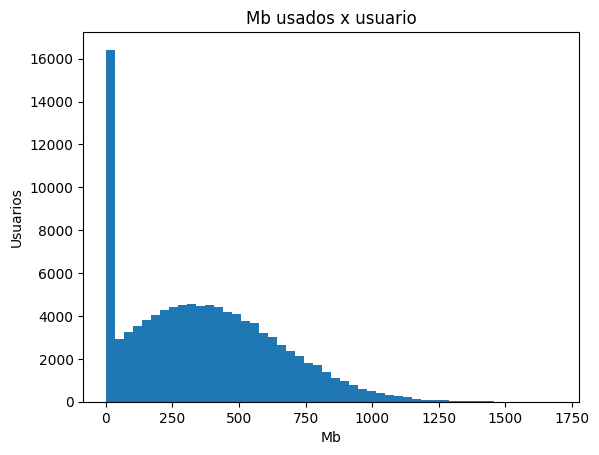

In [316]:
plt.hist(
    internet['mb_used'],
    bins=50
)
plt.xlabel('Mb')
plt.ylabel('Usuarios')
plt.title('Mb usados x usuario')

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [317]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [318]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')
sum_calls = calls.groupby(['user_id','month'])['call_date'].count().reset_index()
print(sum_calls)

      user_id    month  call_date
0        1000  2018-12         16
1        1001  2018-08         27
2        1001  2018-09         49
3        1001  2018-10         65
4        1001  2018-11         64
...       ...      ...        ...
2253     1498  2018-12         39
2254     1499  2018-09         41
2255     1499  2018-10         53
2256     1499  2018-11         45
2257     1499  2018-12         65

[2258 rows x 3 columns]


In [319]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_used = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
print(min_used)

      user_id    month  duration
0        1000  2018-12       124
1        1001  2018-08       182
2        1001  2018-09       315
3        1001  2018-10       393
4        1001  2018-11       426
...       ...      ...       ...
2253     1498  2018-12       339
2254     1499  2018-09       346
2255     1499  2018-10       385
2256     1499  2018-11       308
2257     1499  2018-12       496

[2258 rows x 3 columns]


In [320]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.to_period('M')
messages_sent = messages.groupby(['user_id','month'])['message_date'].count().reset_index()
print(messages_sent)

      user_id    month  message_date
0        1000  2018-12            11
1        1001  2018-08            30
2        1001  2018-09            44
3        1001  2018-10            53
4        1001  2018-11            36
...       ...      ...           ...
1801     1496  2018-09            21
1802     1496  2018-10            18
1803     1496  2018-11            13
1804     1496  2018-12            11
1805     1497  2018-12            50

[1806 rows x 3 columns]


In [321]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('M')
mb_used_monthly = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
mb_used_monthly['mb_used'] = np.ceil(mb_used_monthly['mb_used'])
mb_used_monthly['mb_used'] = pd.to_numeric(mb_used_monthly['mb_used']).astype(int)
print(mb_used_monthly)

      user_id    month  mb_used
0        1000  2018-12     1902
1        1001  2018-08     6920
2        1001  2018-09    13315
3        1001  2018-10    22331
4        1001  2018-11    18505
...       ...      ...      ...
2272     1498  2018-12    23138
2273     1499  2018-09    12985
2274     1499  2018-10    19493
2275     1499  2018-11    16814
2276     1499  2018-12    22060

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [322]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df = mb_used_monthly.merge(messages_sent, on=['user_id','month'], how='outer')
df = df.merge(min_used, on=['user_id','month'], how='outer')
df = df.merge(sum_calls, on=['user_id','month'], how='outer')
df = df.rename(columns={
    'mb_used':'total_mb',
    'message_date':'total_messages',
    'duration':'total_minutes',
    'call_date':'total_calls'
})
print(df.head(20))

    user_id    month  total_mb  total_messages  total_minutes  total_calls
0      1000  2018-12    1902.0            11.0          124.0         16.0
1      1001  2018-08    6920.0            30.0          182.0         27.0
2      1001  2018-09   13315.0            44.0          315.0         49.0
3      1001  2018-10   22331.0            53.0          393.0         65.0
4      1001  2018-11   18505.0            36.0          426.0         64.0
5      1001  2018-12   19370.0            44.0          412.0         56.0
6      1002  2018-10    6553.0            15.0           59.0         11.0
7      1002  2018-11   19346.0            32.0          386.0         55.0
8      1002  2018-12   14397.0            41.0          384.0         47.0
9      1003  2018-12   27045.0            50.0         1104.0        149.0
10     1004  2018-05    6548.0             7.0          193.0         21.0
11     1004  2018-06   20673.0            18.0          275.0         44.0
12     1004  2018-07   24

In [323]:
# rellenamos los valores ausentes
df['total_mb'] = df['total_mb'].fillna(0)
df['total_messages'] = df['total_messages'].fillna(0)
df['total_minutes'] = df['total_minutes'].fillna(0)
df['total_calls'] = df['total_calls'].fillna(0)
df['month'] = df['month'].ffill()
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month           2293 non-null   period[M]
 2   total_mb        2293 non-null   float64  
 3   total_messages  2293 non-null   float64  
 4   total_minutes   2293 non-null   float64  
 5   total_calls     2293 non-null   float64  
dtypes: float64(4), int64(1), period[M](1)
memory usage: 107.6 KB
      user_id    month  total_mb  total_messages  total_minutes  total_calls
0        1000  2018-12    1902.0            11.0          124.0         16.0
1        1001  2018-08    6920.0            30.0          182.0         27.0
2        1001  2018-09   13315.0            44.0          315.0         49.0
3        1001  2018-10   22331.0            53.0          393.0         65.0
4        1001  2018-11   18505.0            36.0          426.0    

In [324]:
# Añade la información de la tarifa
user_plan = users.groupby(['user_id'])['plan'].first().reset_index()
print(user_plan.head())
df = df.merge(user_plan, on='user_id', how='outer')

   user_id      plan
0     1000  ultimate
1     1001      surf
2     1002      surf
3     1003      surf
4     1004      surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [325]:
df_merged = pd.merge(df, plans, left_on='plan', right_on='plan_name', how='left')
print(df_merged.sample(20))

      user_id    month  total_mb  total_messages  total_minutes  total_calls  \
943      1196  2018-02   20086.0            23.0          519.0         78.0   
2262     1491  2018-12    6767.0            43.0          399.0         55.0   
919      1191  2018-08   14179.0            14.0          403.0         68.0   
667      1140  2018-09   14412.0            12.0          725.0         97.0   
1549     1335  2018-06   18535.0            90.0          235.0         37.0   
2167     1468  2018-10   18879.0            40.0          437.0         68.0   
1482     1321  2018-12   23319.0             0.0          490.0         70.0   
1705     1365  2018-07    5980.0            52.0         1082.0        155.0   
43       1010  2018-09   16814.0             0.0          601.0         83.0   
1483     1322  2018-08    3566.0             0.0           28.0          3.0   
347      1073  2018-10   13236.0             0.0          334.0         50.0   
1233     1259  2018-07    2115.0        

In [326]:
def calculo_tarifa(data):

    extra_mb = (data['total_mb'] - data['mb_per_month_included']).clip(lower=0)
    extra_minutes = (data['total_minutes'] - data['minutes_included']).clip(lower=0)
    extra_messages = (data['total_messages'] - data['messages_included']).clip(lower=0)
    # clip(lower=0) nos va a ayudar a asignar un cero en caso de que el valor sea negativo
    # esto nos indicaria que el usuario no excedio su tarifa

    extra_gb_cost = (extra_mb / 1024) * data['usd_per_gb']
    extra_messages_cost = extra_messages * data['usd_per_message']
    extra_minutes_cost = extra_minutes * data['usd_per_minute']

    total = round(
        extra_gb_cost + extra_minutes_cost + extra_messages_cost + data['usd_monthly_pay'],
        2
    )

    return total, extra_mb, extra_messages, extra_minutes

In [327]:
print(df_merged[['total_mb', 'total_messages', 'total_minutes']].describe())

           total_mb  total_messages  total_minutes
count   2293.000000     2293.000000    2293.000000
mean   16764.890973       33.166594     429.283471
std     7967.237366       34.070085     236.320077
min        0.000000        0.000000       0.000000
25%    12236.000000        3.000000     265.000000
50%    16831.000000       26.000000     425.000000
75%    21000.000000       51.000000     572.000000
max    70932.000000      266.000000    1510.000000


In [338]:
# Calcula el ingreso mensual para cada usuario
resultados = calculo_tarifa(df_merged)
df_merged['pago_mensual'] = resultados[0]
df_merged['extra_mb'] = resultados[1]
df_merged['extra_messages'] = resultados[2]
df_merged['extra_minutes'] = resultados[3]
print(df_merged[['user_id','plan','pago_mensual','extra_mb','extra_messages','extra_minutes']].sample(50))

      user_id      plan  pago_mensual  extra_mb  extra_messages  extra_minutes
1951     1414      surf        166.62   15002.0             4.0            0.0
1657     1358      surf         49.91    3063.0             0.0            0.0
456      1097      surf         74.31    5180.0             0.0          124.0
1390     1299      surf         51.95    3272.0             0.0            0.0
1453     1316      surf         20.00       0.0             0.0            0.0
2082     1447      surf         20.00       0.0             0.0            0.0
379      1079      surf         47.28    2016.0            21.0          232.0
1738     1371      surf         90.48    7217.0             0.0            0.0
2147     1465  ultimate         70.00       0.0             0.0            0.0
1476     1321      surf         45.01    2367.0             0.0           63.0
1766     1380  ultimate         70.00       0.0             0.0            0.0
2118     1458  ultimate         70.00       0.0     

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

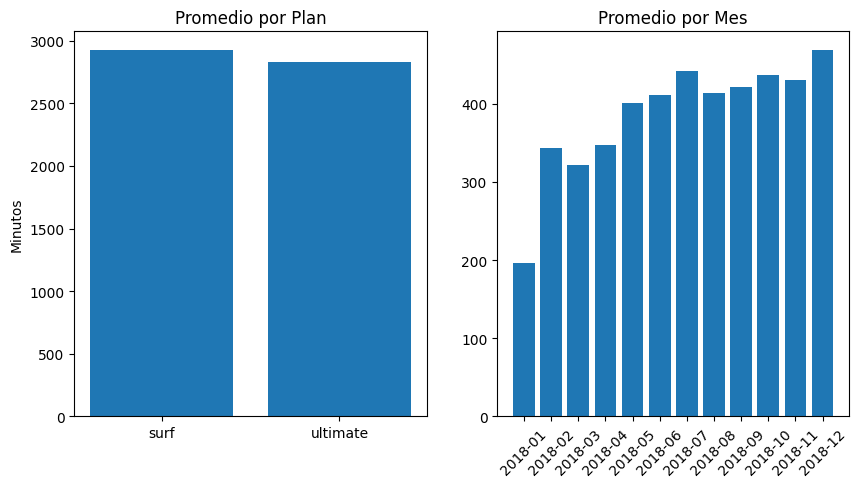

In [356]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
prueba = calls.groupby('user_id')['duration'].sum().reset_index()
promedio_por_plan = pd.merge(prueba, df_merged[['user_id','plan']],on='user_id')
per_plan = promedio_por_plan.groupby('plan')['duration'].mean().reset_index()
per_month = df_merged.groupby('month')['total_minutes'].mean().reset_index()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(per_plan['plan'].astype(str), per_plan['duration'])
plt.title('Promedio por Plan')
plt.ylabel('Minutos')

plt.subplot(1, 2, 2)
plt.bar(per_month['month'].astype(str), per_month['total_minutes'])
plt.title('Promedio por Mes')
plt.xticks(rotation=45)

plt.show()

(array([0, 1]), [Text(0, 0, 'surf'), Text(1, 0, 'ultimate')])

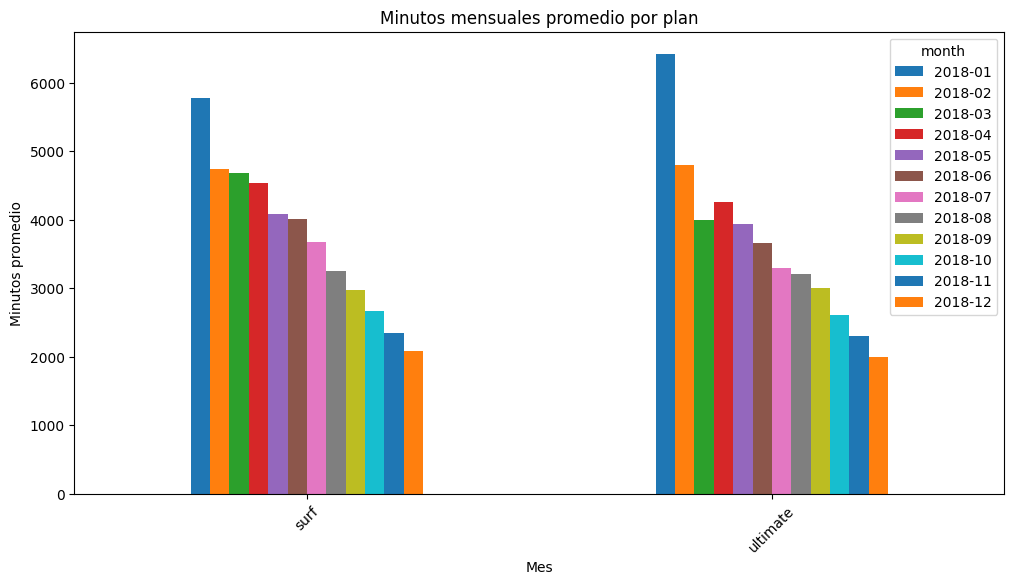

In [361]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
prueba2 = calls.groupby('user_id')['duration'].sum().reset_index()
prueba2 = pd.merge(prueba2, df_merged[['user_id', 'plan', 'month']], on='user_id')
minutes_plan_mes = prueba2.groupby(['plan', 'month'])['duration'].mean().unstack()

minutes_plan_mes.plot(kind='bar',
                      figsize=(12,6),
                      width=0.5
                      )
plt.title('Minutos mensuales promedio por plan')
plt.ylabel('Minutos promedio')
plt.xlabel('Plan')
plt.xticks(rotation=45)

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [365]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf = prueba2[prueba2['plan']=='surf']['duration'].agg(['count', 'mean', 'var', 'std', 'min', 'max'])
ultimate = prueba2[prueba2['plan']=='ultimate']['duration'].agg(['count', 'mean', 'var', 'std', 'min', 'max'])

result = pd.DataFrame({
    'surf':surf,
    'ultimate':ultimate
})
print(result)

               surf      ultimate
count  1.546000e+03  7.170000e+02
mean   2.927047e+03  2.829199e+03
var    3.396273e+06  3.456749e+06
std    1.842898e+03  1.859233e+03
min    6.000000e+00  1.100000e+01
max    9.495000e+03  8.517000e+03


Text(0.5, 1.0, 'Distribución de duración por mes')

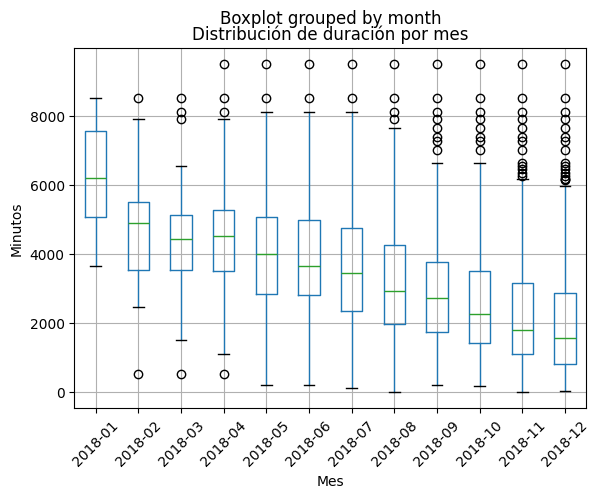

In [373]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
prueba2.boxplot(column='duration',by='month', rot=45)
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.title('Distribución de duración por mes')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El comportamiento de los usuarios no difiere mucho segun sea el plan, los que tienen un plan surf consumen ligeramente mas que los que tienen un plan ultimate, esto basado en el promedio por plan, solamente en enero es cuando el promedio de minutos por mes es ligeramente mayor el plan ultimate comparado con el surf, aunque en aspectos generales, los usuarios surf tienen el promedio mayor.

### Mensajes

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2018-01'),
  Text(1, 0, '2018-02'),
  Text(2, 0, '2018-03'),
  Text(3, 0, '2018-04'),
  Text(4, 0, '2018-05'),
  Text(5, 0, '2018-06'),
  Text(6, 0, '2018-07'),
  Text(7, 0, '2018-08'),
  Text(8, 0, '2018-09'),
  Text(9, 0, '2018-10'),
  Text(10, 0, '2018-11'),
  Text(11, 0, '2018-12')])

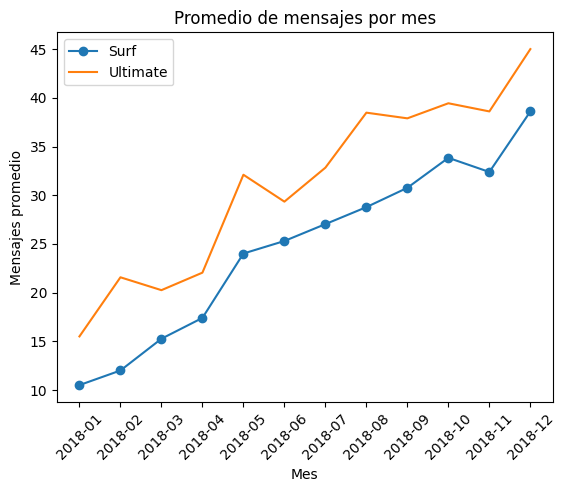

In [391]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
prueba3 = df_merged.groupby(['month','plan'])['total_messages'].mean().reset_index()
surf_messages = prueba3[prueba3['plan']=='surf']
plt.plot(surf_messages['month'].astype(str),surf_messages['total_messages'],marker='o', label='Surf')

ultimate_messages = prueba3[prueba3['plan']=='ultimate']
plt.plot(surf_messages['month'].astype(str),ultimate_messages['total_messages'],label='Ultimate')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.title('Promedio de mensajes por mes')
plt.xticks(rotation=45)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Si, su comportamiento varia acorde a su plan, los que tienen un plan ultimate si consumen mas, pero no es un consumo muy consistente, varia segun el mes del año, comparado con los del plan surf, a pesar de tener menos, su consumo es mas consistente, la unica caida que tiene es de octubre a noviembre, los otros meses crecen constantemente.

### Internet

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2018-01'),
  Text(1, 0, '2018-02'),
  Text(2, 0, '2018-03'),
  Text(3, 0, '2018-04'),
  Text(4, 0, '2018-05'),
  Text(5, 0, '2018-06'),
  Text(6, 0, '2018-07'),
  Text(7, 0, '2018-08'),
  Text(8, 0, '2018-09'),
  Text(9, 0, '2018-10'),
  Text(10, 0, '2018-11'),
  Text(11, 0, '2018-12')])

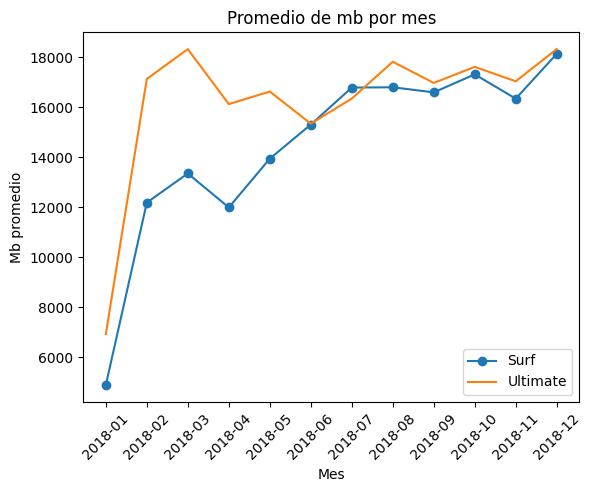

In [392]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
prueba4 = df_merged.groupby(['month','plan'])['total_mb'].mean().reset_index()
surf_messages = prueba4[prueba4['plan']=='surf']
plt.plot(surf_messages['month'].astype(str),surf_messages['total_mb'],marker='o', label='Surf')

ultimate_messages = prueba4[prueba4['plan']=='ultimate']
plt.plot(surf_messages['month'].astype(str),ultimate_messages['total_mb'],label='Ultimate')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Mb promedio')
plt.title('Promedio de mb por mes')
plt.xticks(rotation=45)


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Los usuarios del plan ultimate si consumen mas internet que los del plan surf, pero su comportamiento cambia a partir de marzo, suelen consumir menos y se mantienen con un consumo controlado o 'constante', mientras que los del plan surf, tienden a consumir a consumir mas internet de lo que tienen contratado a partir de junio (mes 6).

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [397]:
ingresos_por_mes = df_merged.groupby(['plan'])['pago_mensual'].describe()

In [398]:
print(ingresos_por_mes)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  57.675677  53.861757  20.0  20.0  37.39  77.13  583.07
ultimate   720.0  72.116319  10.769675  70.0  70.0  70.00  70.00  178.53


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Por lo que se puedo observar, si nos basamos en graficas anteriores como apoyo, hemos observado que los usuarios del plan surf tienden a consumir mas, exceden sus planes, por lo que, como podemos ver, sus pagos mensuales suelen ser mucho mas altos que los usuarios del plan ultimate, que a pesar de que tambien tienen excedentes, los excedentes de surf son 3 veces mayores (tomando de referencia el maximo valor).

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula:  No hay diferencia de consumo entre los usuarios del plan surf y plan ultimate
Hipotesis alternativa: Existe diferencia significativa en el consumo promedio entre los usuarios del plan surf y ultimate.

In [425]:
# Prueba las hipótesis
df_merged['pago_mensual'] = df_merged['pago_mensual'].fillna(0)
ingresos_surf = df_merged[df_merged['plan'] == 'surf']['pago_mensual']
ingresos_ultimate = df_merged[df_merged['plan'] == 'ultimate']['pago_mensual']
alpha = 0.05
p_le = stats.levene(ingresos_surf, ingresos_ultimate)
print(f"Homocedasticidad Valor p: {p_le.pvalue:.5f}")

p_valor = stats.ttest_ind(ingresos_surf,ingresos_ultimate, equal_var=True)
print(f"Prueba t (varianzas iguales) Valor p: {p_valor.pvalue:.5f}")

p_valor1 = stats.ttest_ind(ingresos_surf,ingresos_ultimate, equal_var=False)
print(f"Prueba t (varianzas desiguales)Valor p: {p_valor1.pvalue:.5f}")

if p_valor.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")



Homocedasticidad Valor p: 0.00000
Prueba t (varianzas iguales) Valor p: 0.00000
Prueba t (varianzas desiguales)Valor p: 0.00000
Rechazamos la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula: No hay diferencia entre NY-NJ y otras areas.
Hipotesis alternativa: Hay diferencia entre los ingresos de las areas NY-NJ y otras areas.

New York-Newark-Jersey City, NY-NJ-PA MSA

In [419]:
# Prueba las hipótesis
df_completo = pd.merge(
    df_merged,
    users[['user_id','city']],
    on='user_id',
    how='left'
)

In [422]:
ny_nj = df_completo['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'
ingresos_ny_nj = df_completo[ny_nj]['pago_mensual']
ingresos_otras = df_completo[~ny_nj]['pago_mensual']

56      20.00
57      38.84
75      20.00
76      98.88
77      20.00
        ...  
2294    67.87
2295    92.93
2296    70.99
2297    57.20
2298    95.96
Name: pago_mensual, Length: 378, dtype: float64
0       70.00
1       20.00
2       20.00
3       88.17
4       50.71
        ...  
2287    70.00
2299    20.00
2300    60.36
2301    34.20
2302    85.43
Name: pago_mensual, Length: 1925, dtype: float64


In [424]:
p_le_ny_nj_otras = stats.levene(ingresos_ny_nj, ingresos_otras)
print(f"Homocedasticidad Valor p: {p_le_ny_nj_otras.pvalue:.5f}")

p_le_ny_nj_otras_2 = stats.ttest_ind(ingresos_ny_nj,ingresos_otras, equal_var=True)
print(f"Prueba t (varianzas iguales) Valor p: {p_le_ny_nj_otras_2.pvalue:.5f}")

p_le_ny_nj_otras_3 = stats.ttest_ind(ingresos_ny_nj,ingresos_otras, equal_var=False)
print(f"Prueba t (varianzas desiguales)Valor p: {p_le_ny_nj_otras_3.pvalue:.5f}")

if p_le_ny_nj_otras_2.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Homocedasticidad Valor p: 0.28062
Prueba t (varianzas iguales) Valor p: 0.03241
Prueba t (varianzas desiguales)Valor p: 0.02348
Rechazamos la hipotesis nula


In [427]:
print(f"Promedio de ingresos en NY-NJ: {ingresos_ny_nj.mean()}")
print(f"Promedio de ingresos en otras: {ingresos_otras.mean()}")

Promedio de ingresos en NY-NJ: 57.35383597883598
Promedio de ingresos en otras: 62.840436363636364


Como podemos ver, si hay una diferencia de ingresos, donde el ingreso en otras areas es mayor.

p## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. Podemos notar que el promedio en NY-NJ es menor al de otras regiones, no hay mucha diferencia, la varianza es igual, como nos dice la homocedasticidad.
2. Hay un patron que se puede ver en los usuarios del plan surf, tienden a consumir de manera constante mas de lo que tienen en sus planes, se puede decir que es mas variables, especialmente desde junio, mientras que los usuarios del plan ultimiate son mas estables y no consumen mas de lo que tienen, hay pocos usuarios que si sobrepasan sus consumos, pero son valores atipicos, en su consumo promedio se pudo ver que surf consume 5 veces mas.
3. En consumo de mensajes, los del plan ultimate si consumen mas que los del plan surf, aunque son muy variables, hay meses que consumen menos, mientras que los usuarios de surf son mas estables, aunque segun la grafica, no sobrepasan su consumo.
4. En el consumo de llamadas, aunque tienen un promedio casi similar, se puede ver que en las graficas que plan surf su consumo sigue siendo mayor, no hay mucha diferencia, en cuanto al promedio y valor maximo, la diferencia es poca, aunque en el mes de enero es cuando los del plan ultimate si consumen mas, aunque en el valor minimo, si hay mucha diferencia, mientras que los usuarios del plan ultimate, los que menos consumen suelen ser de ~1 min, los del plan surf su minimo es de ~6 min. En el segundo semestre del año, considerando la comparativa de ambos planes, se puede ver que hay un mayor numero de valores atipicos, concuerda con el patron de comportamiento de los usuarios del plan surf, suelen consumir mas en el segundo semestre.
5. Recomendaciones: Migracion de usuarios surf a ultimate con promociones basado en analisis ROI y una prueba piloto (corto plazo), paquetes personalizados basados en sus consumos (largo plazo).